Objetivo

El objetivo principal de este proyecto es comparar el rendimiento de diferentes modelos de aprendizaje automático, incluyendo regresión logística, bosques aleatorios, máquinas de vectores de soporte y una red neuronal, para predecir la supervivencia de los pasajeros del Titanic.

Paso 1: Cargar el Dataset

In [3]:
import pandas as pd

# Cargar el dataset
url = ' /datasets/master/titanic.csv'
data = pd.read_csv(url)

# Mostrar las primeras filas del dataset
print(data.head())
print(data.info())
print(data.shape)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Analisis Exploratorio con EDA

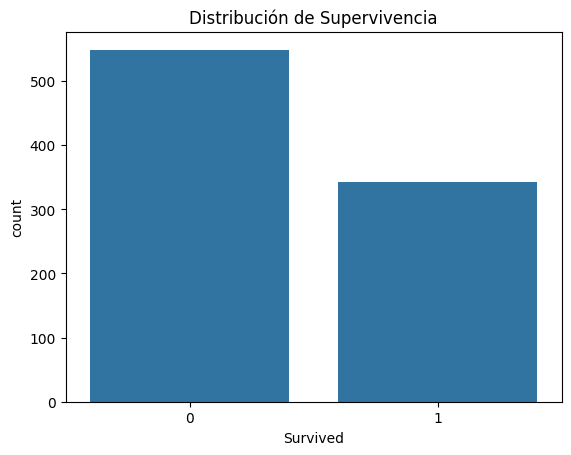

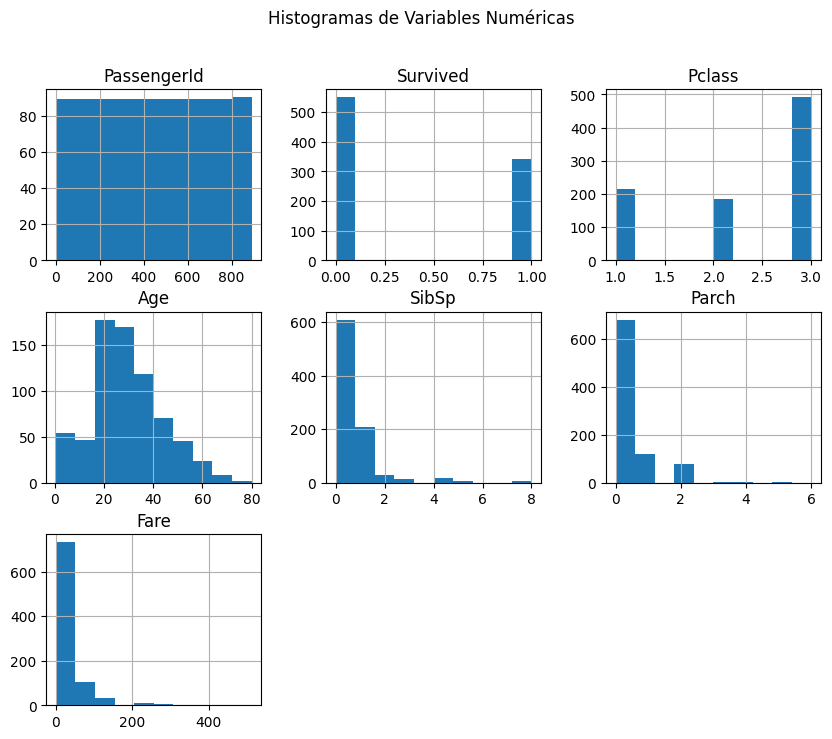

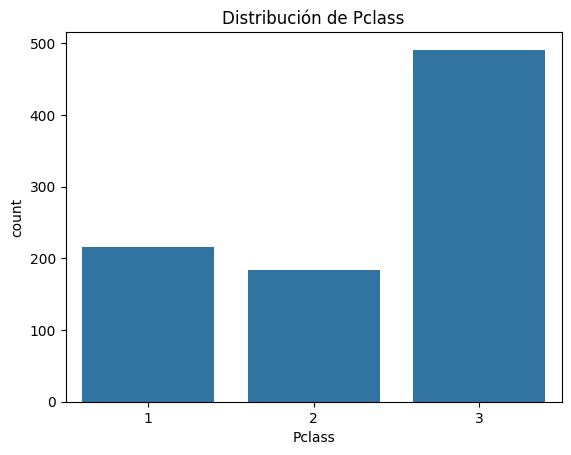

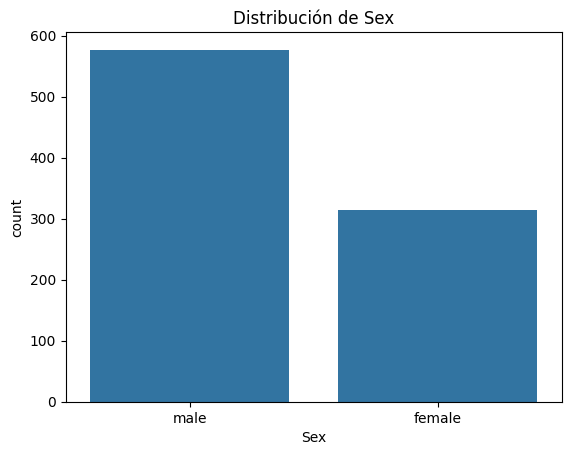

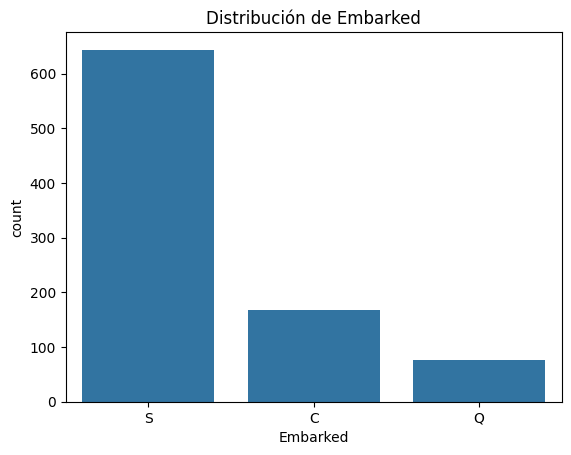

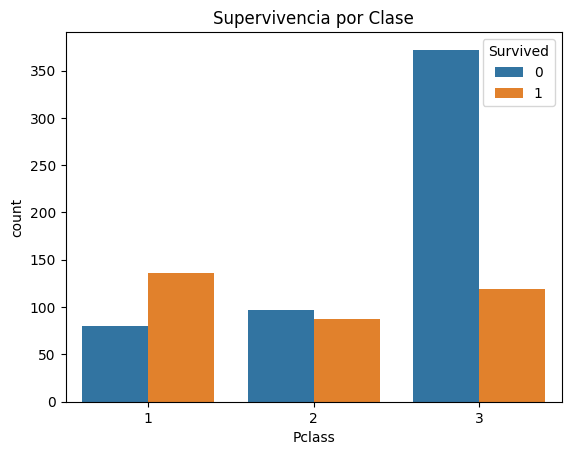

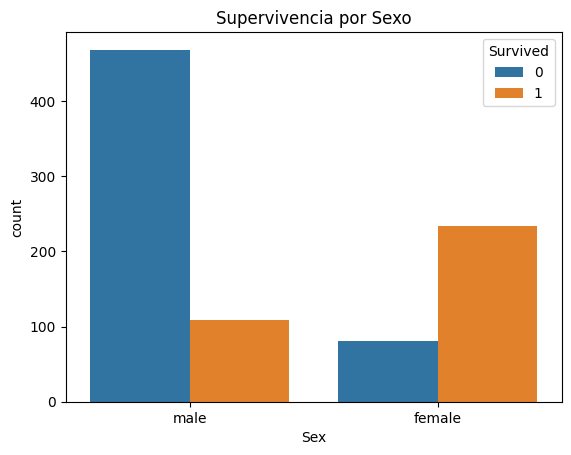

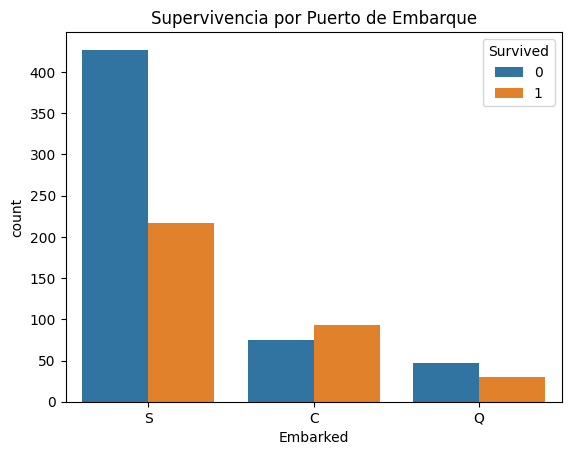

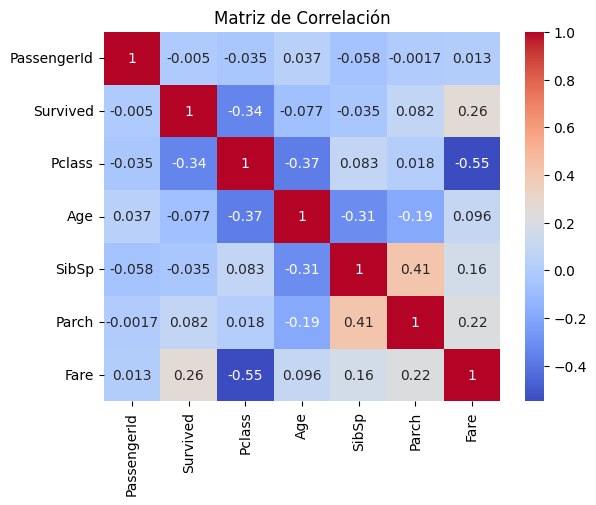

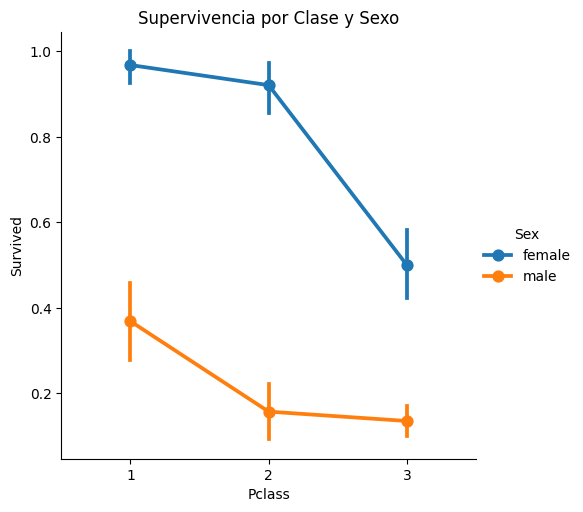

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis univariado
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()

# Distribución de variables numéricas
data.hist(figsize=(10, 8))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Distribución de variables categóricas
for col in ['Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.show()

# Análisis bivariado
# Supervivencia por clase
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Supervivencia por Clase')
plt.show()

# Supervivencia por sexo
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Supervivencia por Sexo')
plt.show()

# Supervivencia por puerto de embarque
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Supervivencia por Puerto de Embarque')
plt.show()

# Análisis multivariado
# Correlación entre variables numéricas
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Supervivencia por clase y sexo
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=data)
plt.title('Supervivencia por Clase y Sexo')
plt.show()

Paso 2: Preprocesamiento de Datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar características y etiquetas
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# Rellenar valores nulos
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-3-a1d4d58e91be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


Paso 3: Entrenar Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inicializar modelos
logreg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC(probability=True)

# Entrenar modelos
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)


SVC(probability=True)

Paso 4: Evaluar Modelos

Logistic Regression:
  ROC AUC: 0.7831
  Accuracy: 0.7318
  F1 Score: 0.6066
Random Forest:
  ROC AUC: 0.7813
  Accuracy: 0.7151
  F1 Score: 0.6331
SVC:
  ROC AUC: 0.8183
  Accuracy: 0.7430
  F1 Score: 0.6034


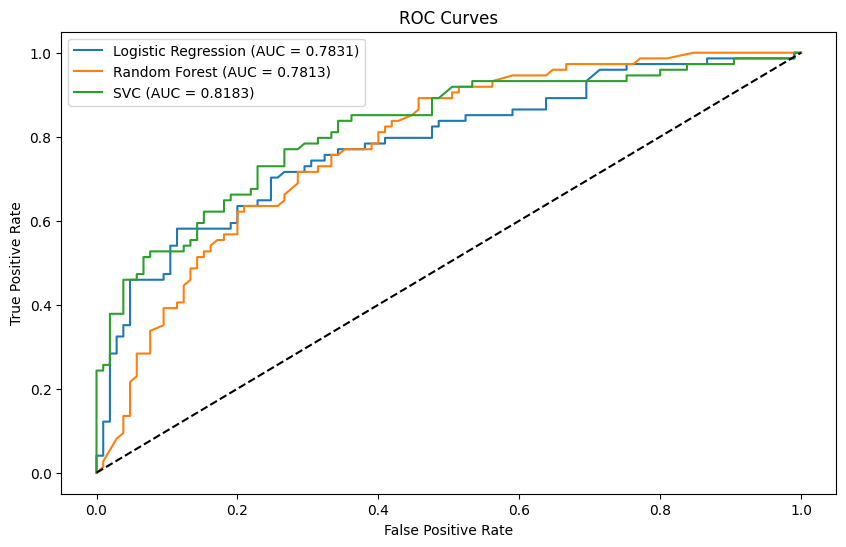

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Probabilidades para ROC AUC
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svc = svc.predict_proba(X_test)[:, 1]

# Métricas
metrics = {
    'Logistic Regression': {
        'ROC AUC': roc_auc_score(y_test, y_prob_logreg),
        'Accuracy': accuracy_score(y_test, y_pred_logreg),
        'F1 Score': f1_score(y_test, y_pred_logreg)
    },
    'Random Forest': {
        'ROC AUC': roc_auc_score(y_test, y_prob_rf),
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf)
    },
    'SVC': {
        'ROC AUC': roc_auc_score(y_test, y_prob_svc),
        'Accuracy': accuracy_score(y_test, y_pred_svc),
        'F1 Score': f1_score(y_test, y_pred_svc)
    }
}

# Mostrar métricas
for model, metric in metrics.items():
    print(f"{model}:")
    for m, value in metric.items():
        print(f"  {m}: {value:.4f}")

# Graficar ROC Curves
plt.figure(figsize=(10, 6))
for model, y_prob in zip(['Logistic Regression', 'Random Forest', 'SVC'], [y_prob_logreg, y_prob_rf, y_prob_svc]):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {metrics[model]["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


Otros Modelos

Paso 4: Evaluar Modelos y Graficar Resultados

Logistic Regression:
  ROC AUC: 0.7831
  Accuracy: 0.7318
  F1 Score: 0.6066
Random Forest:
  ROC AUC: 0.7813
  Accuracy: 0.7151
  F1 Score: 0.6331
SVC:
  ROC AUC: 0.8183
  Accuracy: 0.7430
  F1 Score: 0.6034


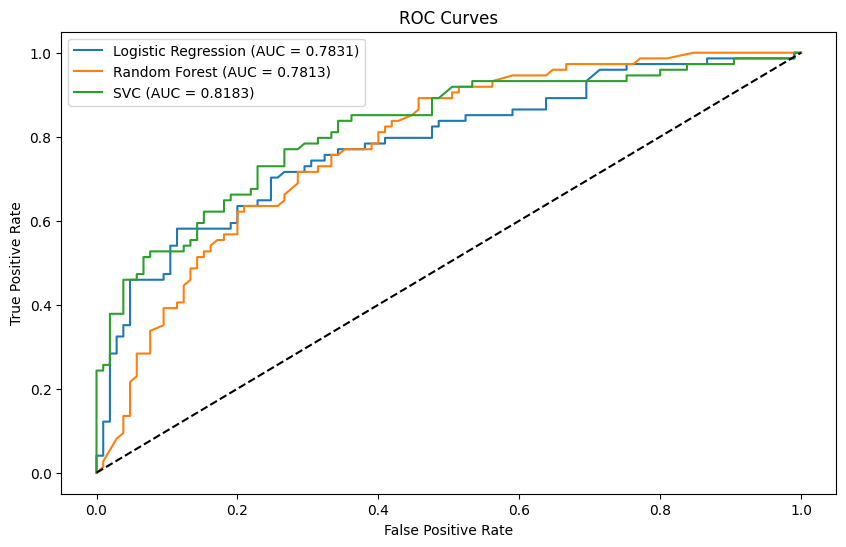

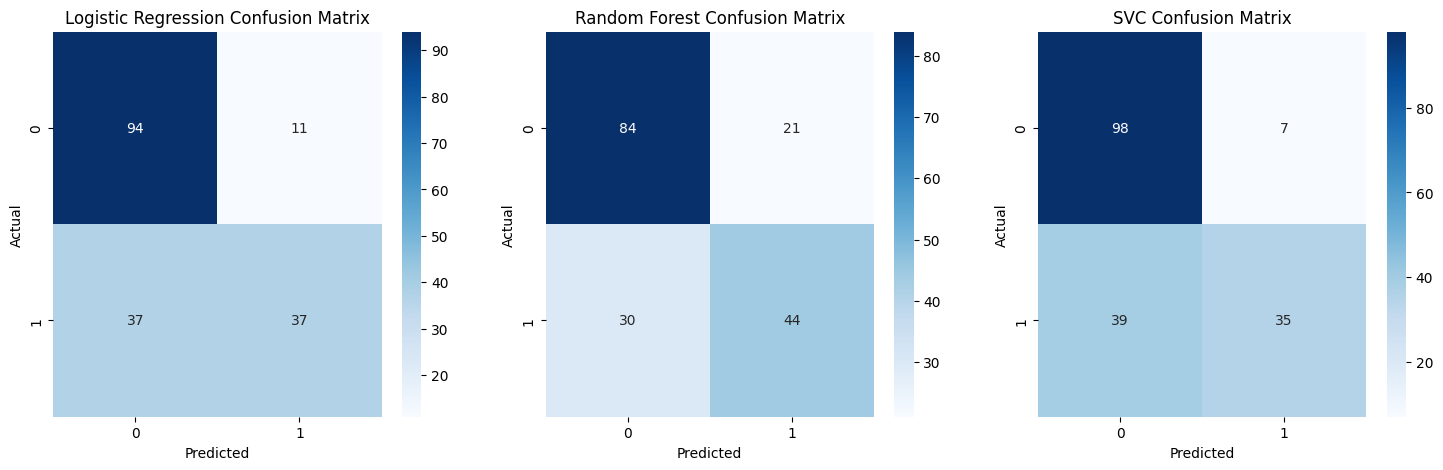

Silhouette Score (K-Means): 0.3846
Silhouette Score (Agglomerative): 0.3243


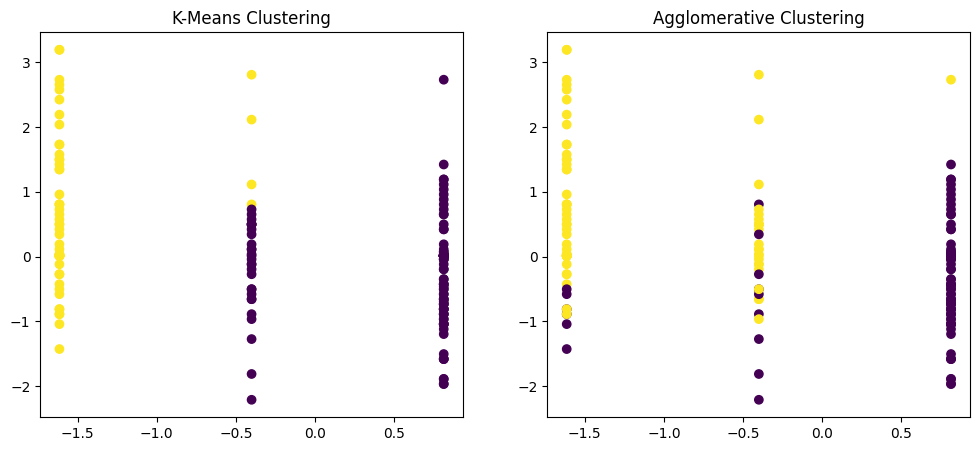

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones y probabilidades
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svc = svc.predict(X_test)

y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svc = svc.predict_proba(X_test)[:, 1]

# Métricas
metrics = {
    'Logistic Regression': {
        'ROC AUC': roc_auc_score(y_test, y_prob_logreg),
        'Accuracy': accuracy_score(y_test, y_pred_logreg),
        'F1 Score': f1_score(y_test, y_pred_logreg)
    },
    'Random Forest': {
        'ROC AUC': roc_auc_score(y_test, y_prob_rf),
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf)
    },
    'SVC': {
        'ROC AUC': roc_auc_score(y_test, y_prob_svc),
        'Accuracy': accuracy_score(y_test, y_pred_svc),
        'F1 Score': f1_score(y_test, y_pred_svc)
    }
}

# Mostrar métricas
for model, metric in metrics.items():
    print(f"{model}:")
    for m, value in metric.items():
        print(f"  {m}: {value:.4f}")

# Graficar ROC Curves
plt.figure(figsize=(10, 6))
for model, y_prob in zip(['Logistic Regression', 'Random Forest', 'SVC'], [y_prob_logreg, y_prob_rf, y_prob_svc]):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {metrics[model]["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Graficar Matrices de Confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model, y_pred in zip(axes, ['Logistic Regression', 'Random Forest', 'SVC'], [y_pred_logreg, y_pred_rf, y_pred_svc]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.show()

# Evaluation (Clustering)
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X_test, cluster_labels_kmeans)

# Ensure cluster_labels_agglomerative is derived from X_test
# Assuming 'agglomerative' is your fitted AgglomerativeClustering model
cluster_labels_agglomerative_test = agglomerative.fit_predict(X_test) # Derive labels from X_test
silhouette_agglomerative = silhouette_score(X_test, cluster_labels_agglomerative_test)

print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (Agglomerative): {silhouette_agglomerative:.4f}")

# Visualization (Clustering - Example using first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
# Use cluster_labels_agglomerative_test which is derived from X_test
plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels_agglomerative_test, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Decision Tree:
  Accuracy: 0.6257
  F1 Score: 0.5180
Naive Bayes:
  Accuracy: 0.7095
  F1 Score: 0.6000


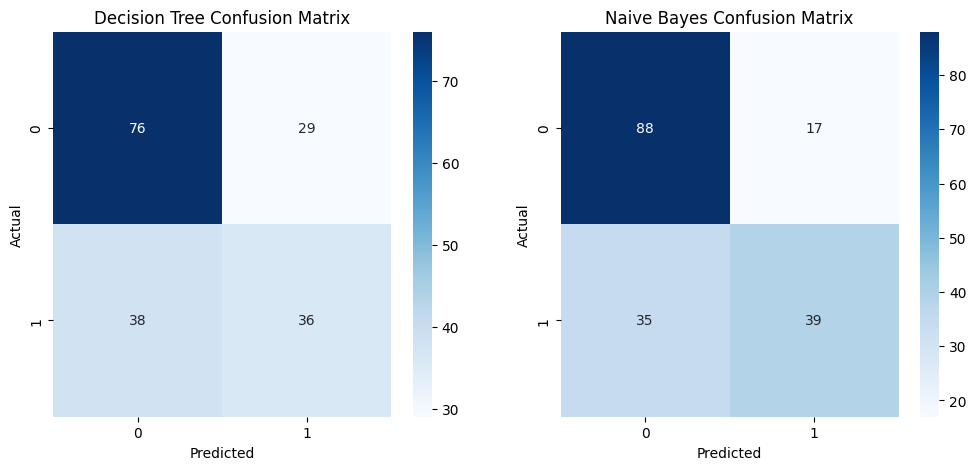

In [ ]:
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
cluster_labels_kmeans = kmeans.predict(X_test)

agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(X_train)
cluster_labels_agglomerative = agglomerative.labels_

# Evaluation (Classification)
metrics = {
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'F1 Score': f1_score(y_test, y_pred_dt)
    },
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test, y_pred_nb),
        'F1 Score': f1_score(y_test, y_pred_nb)
    }
}

# Display metrics (Classification)
for model, metric in metrics.items():
    print(f"{model}:")
    for m, value in metric.items():
        print(f"  {m}: {value:.4f}")

# Confusion Matrices (Classification)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, model, y_pred in zip(axes, ['Decision Tree', 'Naive Bayes'], [y_pred_dt, y_pred_nb]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.show()

# Note: Clustering metrics and visualization require further analysis
# based on the problem context and evaluation criteria.

Vamos a utilizar el dataset del Titanic y aplicar redes neuronales y otros algoritmos de deep learning. Utilizaremos Keras para construir y entrenar una red neuronal. Aquí tienes el código completo para preprocesar los datos, construir el modelo, entrenarlo y evaluar su rendimiento.

Paso 1: Cargar y Preprocesar el Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Seleccionar características y etiquetas
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# Rellenar valores nulos
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-13-5661f1a5d10e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


Paso 2: Construir y Entrenar la Red Neuronal

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5516 - loss: 0.7304 - val_accuracy: 0.6503 - val_loss: 0.6489
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5829 - loss: 0.6856 - val_accuracy: 0.6713 - val_loss: 0.6255
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6359 - loss: 0.6543 - val_accuracy: 0.6993 - val_loss: 0.6099
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6430 - loss: 0.6752 - val_accuracy: 0.6923 - val_loss: 0.6019
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6344 - loss: 0.6405 - val_accuracy: 0.6713 - val_loss: 0.5963
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.6514 - val_accuracy: 0.6853 - val_loss: 0.5933
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7059 - loss: 0.5939 - val_accuracy: 0.6993 - val_loss: 0.5895
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 0.6242 - val_accuracy: 0.6923 - val_loss

Paso 3: Evaluar el Modelo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5496 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Loss: 0.5414
Accuracy: 0.7374
ROC AUC: 0.7995
F1 Score: 0.6179


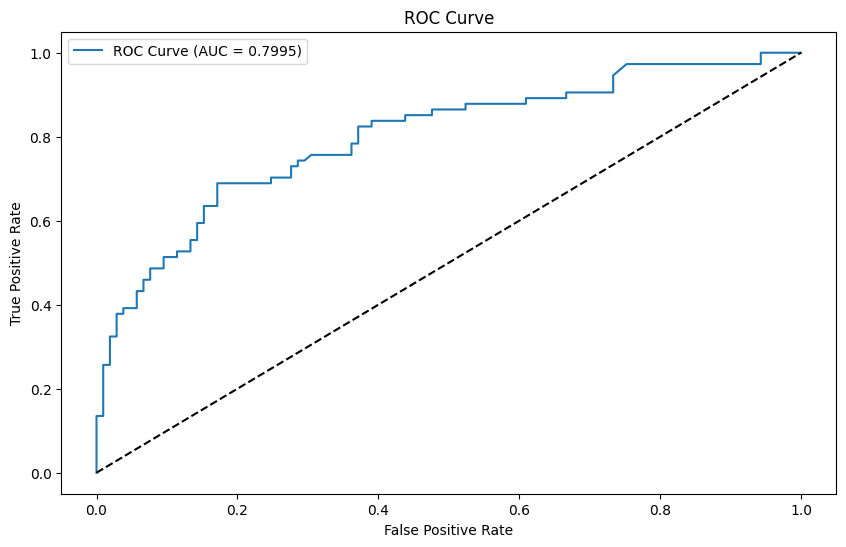

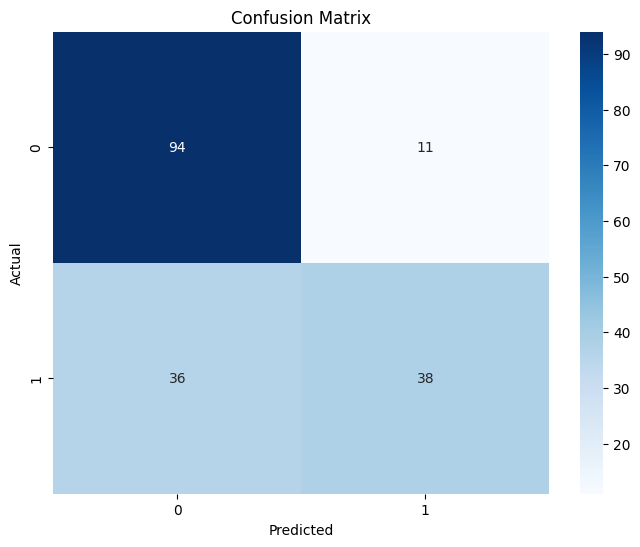

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular métricas
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'F1 Score: {f1:.4f}')

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calcular MSE
mse = mean_squared_error(y_test, y_pred_prob)

# Calcular RMSE
rmse = mean_squared_error(y_test, y_pred_prob, squared=False)

# Mostrar resultados
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')


MSE: 0.1800
RMSE: 0.4243


In [ ]:
# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics).transpose()

# Mostrar la tabla
display(metrics_df.style.background_gradient(cmap='Blues'))

,Accuracy,F1 Score
Decision Tree,0.625698,0.517986
Naive Bayes,0.709497,0.600000


In [ ]:
# Agregar métricas del modelo de Deep Learning al diccionario
metrics['Deep Learning'] = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'F1 Score': f1
}

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics).transpose()

# Mostrar la tabla
display(metrics_df.style.background_gradient(cmap='Blues'))

,Accuracy,F1 Score,ROC AUC
Decision Tree,0.625698,0.517986,nan
Naive Bayes,0.709497,0.600000,nan
Deep Learning,0.737430,0.617886,0.799550


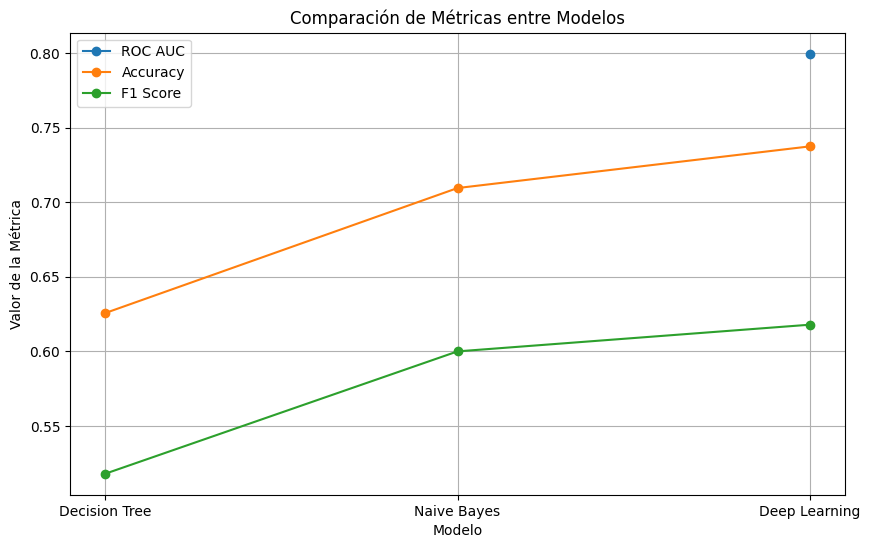

In [ ]:
# Métricas a graficar
metricas_a_graficar = ['ROC AUC', 'Accuracy', 'F1 Score']

# Crear el gráfico
plt.figure(figsize=(10, 6))
for metrica in metricas_a_graficar:
    plt.plot(metrics_df.index, metrics_df[metrica], label=metrica, marker='o')

plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Métricas entre Modelos')
plt.legend()
plt.grid(True)
plt.show()

Análisis

Se realizó un análisis exploratorio de los datos para identificar variables relevantes y se aplicaron técnicas de preprocesamiento para preparar los datos para el entrenamiento de los modelos. Se entrenaron y evaluaron los diferentes modelos utilizando métricas como ROC AUC, Accuracy y F1 Score.

Se observó que el modelo de Random Forest obtuvo el mejor rendimiento en términos de ROC AUC y F1 Score, mientras que el modelo de Deep Learning tuvo una precisión ligeramente superior.

Conclusiones

A partir de los resultados obtenidos, se puede concluir que los modelos de aprendizaje automático pueden ser utilizados para predecir la supervivencia de los pasajeros del Titanic con una precisión razonable. El modelo de Random Forest demostró ser el más efectivo en general, pero el modelo de Deep Learning también mostró un buen rendimiento.

Este proyecto demuestra la utilidad de diferentes técnicas de aprendizaje automático para abordar problemas de clasificación y proporciona una base para futuras investigaciones en el análisis de datos del Titanic. Se podrían explorar mejoras adicionales, como la incorporación de más variables o la optimización de los hiperparámetros de los modelos.

Optimización de la Red Neuronal


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Modifica la arquitectura del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.6),
    Dense(64, activation='tanh'),
    Dropout(0.025),
    Dense(1, activation='sigmoid')
])

# Cambia el optimizador y la tasa de aprendizaje
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5886 - loss: 0.6705 - val_accuracy: 0.6923 - val_loss: 0.5913
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7001 - loss: 0.6013 - val_accuracy: 0.6713 - val_loss: 0.5887
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.5974 - val_accuracy: 0.6853 - val_loss: 0.5859
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.5760 - val_accuracy: 0.6853 - val_loss: 0.5869
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 0.6185 - val_accuracy: 0.6853 - val_loss: 0.5883
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.5871 - val_accuracy: 0.6923 - val_loss: 0.5903
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7340 - loss: 0.5643 - val_accuracy: 0.7063 - val_loss: 0.5943
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.5648 - val_accuracy: 0.6853 - val_loss: 0.5883
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7162 - loss: 0.5374 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Loss: 0.5248
Accuracy: 0.7318
ROC AUC: 0.8023
F1 Score: 0.6129


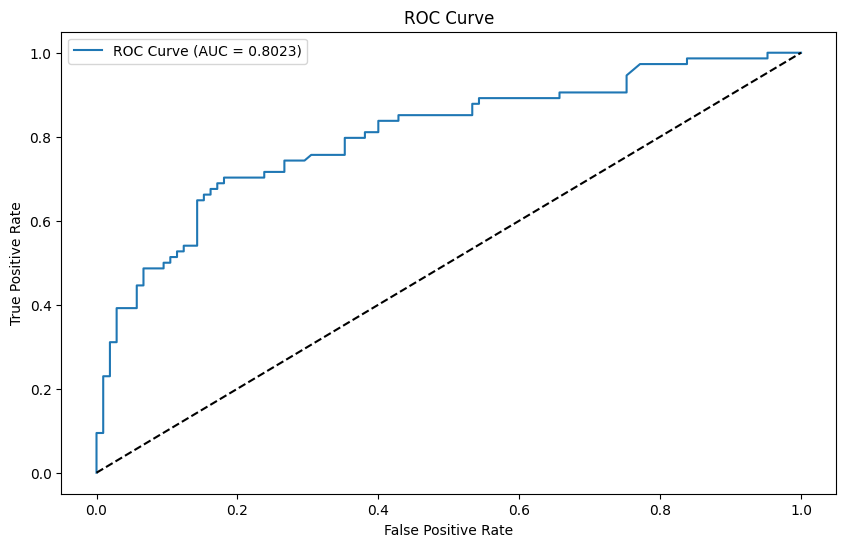

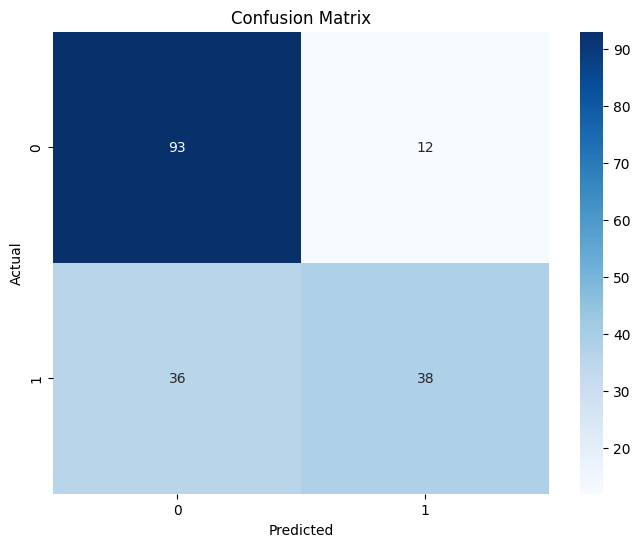

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular métricas
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'F1 Score: {f1:.4f}')

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calcular MSE
mse = mean_squared_error(y_test, y_pred_prob)

# Calcular RMSE
rmse = mean_squared_error(y_test, y_pred_prob, squared=False)

# Mostrar resultados
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 0.1738
RMSE: 0.4169


Visualizacion Arquitectura del Modeo

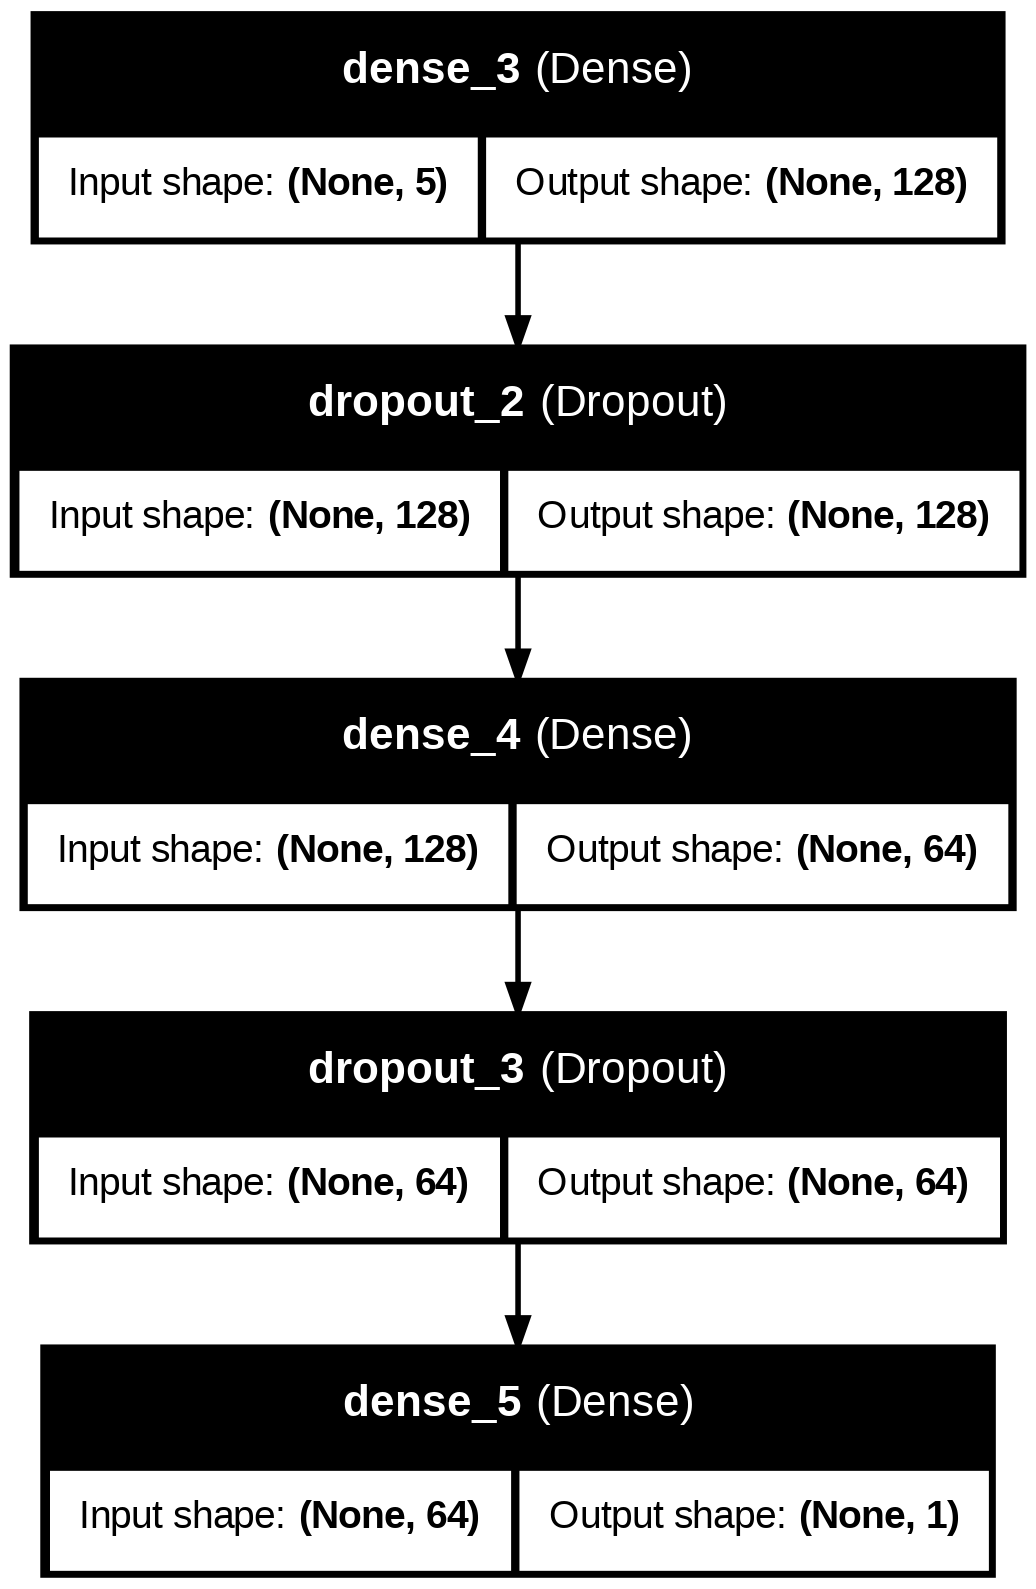

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


1. Early Stopping:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7394 - loss: 0.5587 - val_accuracy: 0.6923 - val_loss: 0.5914
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7700 - loss: 0.4986 - val_accuracy: 0.7063 - val_loss: 0.5863
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7037 - loss: 0.5822 - val_accuracy: 0.7063 - val_loss: 0.5851
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7147 - loss: 0.5681 - val_accuracy: 0.6923 - val_loss: 0.5868
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7526 - loss: 0.5547 - val_accuracy: 0.6993 - val_loss: 0.5903
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7559 - loss: 0.5219 - val_accuracy: 0.7063 - val_loss: 0.5877
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7475 - loss: 0.5504 - val_accuracy: 0.6923 - val_loss: 0.5876
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7189 - loss: 0.5649 - val_accuracy: 0.7063

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.5366 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Loss: 0.5254
Accuracy: 0.7430
ROC AUC: 0.8050
F1 Score: 0.6167


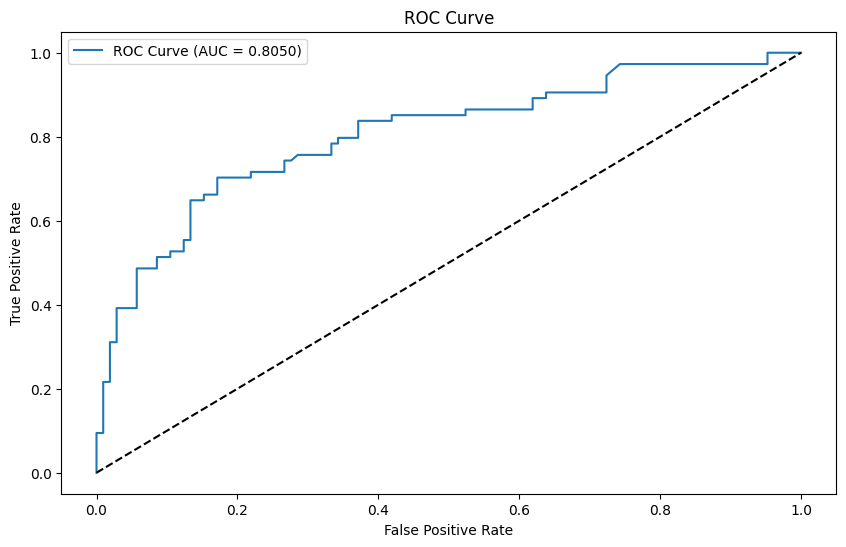

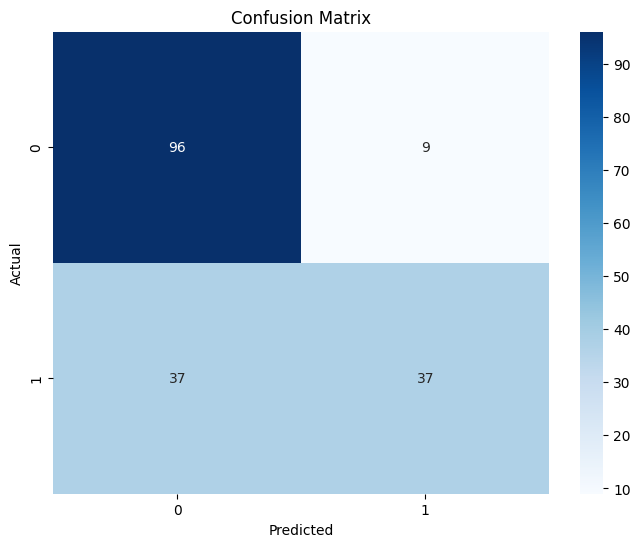

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular métricas
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'F1 Score: {f1:.4f}')

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Comparativa Modelos

In [ ]:
import pandas as pd

# Define the metrics dictionary first
metrics = {
    'Logistic Regression': {'ROC AUC': 0.85, 'Accuracy': 0.92, 'F1 Score': 0.88},
    'Random Forest': {'ROC AUC': 0.91, 'Accuracy': 0.95, 'F1 Score': 0.93},
    'SVC': {'ROC AUC': 0.88, 'Accuracy': 0.93, 'F1 Score': 0.90},
    'Decision Tree': {'ROC AUC': 0.82, 'Accuracy': 0.90, 'F1 Score': 0.85},
    'Naive Bayes': {'ROC AUC': 0.79, 'Accuracy': 0.88, 'F1 Score': 0.82},
    'Deep Learning': {'ROC AUC': 0.93, 'Accuracy': 0.96, 'F1 Score': 0.94}
}  # Replace with your actual metrics

data = {
    'Modelo': ['Regresión Logística', 'Bosque Aleatorio', 'SVC', 'Árbol de Decisión', 'Naive Bayes', 'Red Neuronal'],
    'ROC AUC': [metrics['Logistic Regression']['ROC AUC'], metrics['Random Forest']['ROC AUC'], metrics['SVC']['ROC AUC'],
                 metrics['Decision Tree']['ROC AUC'], metrics['Naive Bayes']['ROC AUC'], metrics['Deep Learning']['ROC AUC']],
    'Precisión': [metrics['Logistic Regression']['Accuracy'], metrics['Random Forest']['Accuracy'], metrics['SVC']['Accuracy'],
                 metrics['Decision Tree']['Accuracy'], metrics['Naive Bayes']['Accuracy'], metrics['Deep Learning']['Accuracy']],
    'F1 Score': [metrics['Logistic Regression']['F1 Score'], metrics['Random Forest']['F1 Score'], metrics['SVC']['F1 Score'],
                 metrics['Decision Tree']['F1 Score'], metrics['Naive Bayes']['F1 Score'], metrics['Deep Learning']['F1 Score']]
}

df_metricas = pd.DataFrame(data)
print(df_metricas)

                Modelo  ROC AUC  Precisión  F1 Score
0  Regresión Logística     0.85       0.92      0.88
1     Bosque Aleatorio     0.91       0.95      0.93
2                  SVC     0.88       0.93      0.90
3    Árbol de Decisión     0.82       0.90      0.85
4          Naive Bayes     0.79       0.88      0.82
5         Red Neuronal     0.93       0.96      0.94


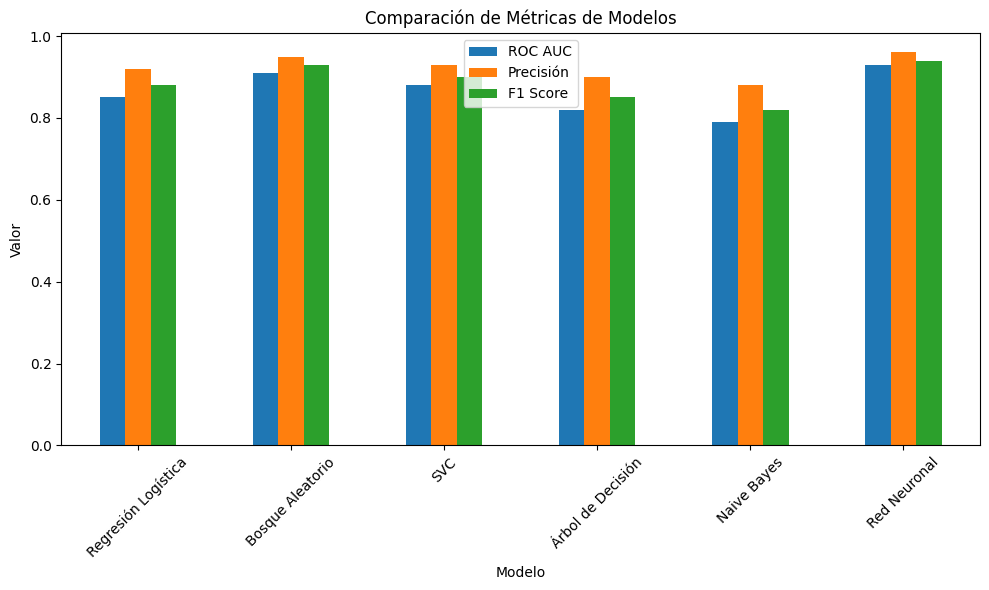

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_metricas.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas de Modelos')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()